# AUGMENTED MNIST CLASSIFIER [affNIST]

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from os.path import dirname, join as pjoin
import scipy.io as sio
import numpy as np
import random
import os
import skimage.io
from skimage.filters import threshold_otsu

In [2]:
# The ConvNet module is a simple network that applies a convolution filter before the multi-layer perceptron
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # Pre-processing with a convolutional filter
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5) 
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5)
        
        # MLP 1 layer, 100 units : The output of the convolutional layer is reduce into a single vector of size 256 -> 100 -> 10 through the MLP
        self.fc1 = nn.Linear(256, 100)
        self.fc2 = nn.Linear(100, 10) # output 10 classes
        
        #Dropout method drop connections between nodes in the MLP during training to reduce training time and avoid over-fitting
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        
        # Pre-processing with a convolutional filter
        #x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=3, stride=3))
        x = F.relu(F.max_pool2d(self.conv1(x), kernel_size=3))
        #x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=2, stride=2))
        x = F.relu(F.max_pool2d(self.conv2(x), kernel_size=4))
       
        # MLP 1 layer, 100 units
        x = self.dropout(F.relu(self.fc1(x.view(-1, 256))))
        x = self.fc2(x)
        
        return x

In [3]:
model = ConvNet()
model.load_state_dict(torch.load('model_bin'))
model.eval()

ConvNet(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

['crop_07.jpg', 'crop_05.jpg', 'crop_04.jpg', 'crop_00.jpg', 'crop_01.jpg', 'crop_08.jpg']
(1812, 1811, 3)


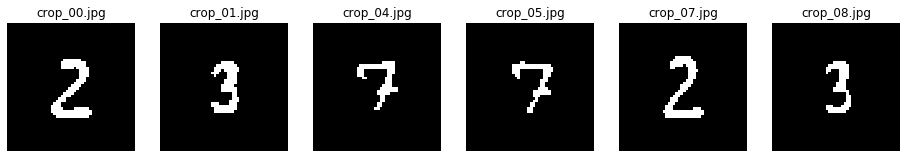

In [15]:
sign_path = 'crop_object_2/'
print(os.listdir(sign_path))
sign_names = [nm for nm in os.listdir(sign_path) if '.jpg' in nm]  # make sure to only load .png
sign_names.sort()  # sort file names
ic_sign = skimage.io.imread_collection([os.path.join(sign_path, nm) for nm in sign_names])
sign_img = skimage.io.concatenate_images(ic_sign)

fig, axes = plt.subplots(1, sign_img.shape[0], figsize=(16, 4))
for ax, im, nm in zip(axes.ravel(), sign_img, sign_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
    
print(sign_img[0].shape)

(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)
(40, 40)


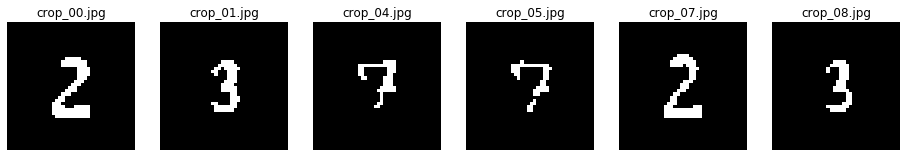

In [12]:
from skimage.transform import rescale

fig, axes = plt.subplots(1, sign_img.shape[0], figsize=(16, 4))
imgs = []
for ax, im, nm in zip(axes.ravel(), sign_img[:,:,:,0], sign_names):
    im = rescale(im, 40/1812, anti_aliasing=False)[:,:]
    ax.imshow(im, cmap='gray')
    print(im.shape)
    ax.axis('off')
    ax.set_title(nm)
    imgs.append(im)

In [9]:
test_im=torch.from_numpy(np.array(imgs).astype(np.float32)).reshape(6,1,40,40)
output_test = model(test_im[0:6,:,:,:]).softmax(1)
_, predicted_classe = torch.max(output_test, 1)
print('test target      :        [2, 3, 7, 7, 2, 3]')
print('test prediction  :', predicted_classe)
b = output_test.detach().numpy()

test target      :        [2, 3, 7, 7, 2, 3]
test prediction  : tensor([2, 3, 7, 7, 2, 3])
